<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2021-05-01 19:38:44--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2021-05-01 19:38:44--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.03s   

2021-05-01 19:38:44 (15.8 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2021-05-01 19:38:44--
Total wall clock time: 0.4s
Downloaded: 1 files, 418K in 0.03s (15.8 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [ ]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

In [3]:
df                   = pd.read_csv("weight_height.csv")
describe             = df.describe()
describe.loc['Nan']  = df.isna().sum()
describe.loc['%Nan'] = (df.isna().mean())*100
describe

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [ ]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes

In [4]:
df_clean = df.copy()
df_clean.dropna(subset=['Gender'], inplace=True)
df_clean.dropna(subset=['Height'], inplace=True)
df_clean.dropna(subset=['Weight'], inplace=True)

In [ ]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

In [5]:
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)

In [6]:
df2 = pd.DataFrame()

In [7]:
df2['Sexo'] = df_clean['Gender'].apply(lambda x: 'Masculino' if x == 'Male' else 'Femenino')

In [8]:
df2['Kilogramos'] = df_clean['Weight'].apply(lambda x: x * 0.453592)

In [9]:
df2['Metros'] = df_clean['Height'].apply(lambda x: x * 0.0254)

In [10]:
df2

,Sexo,Kilogramos,Metros
0,Masculino,109.720985,1.875714
1,Masculino,73.622732,1.747060
2,Masculino,96.497550,1.882397
3,Masculino,99.809504,1.821967
4,Masculino,93.598619,1.774998
...,...,...,...
9995,Femenino,62.041159,1.680785
9996,Femenino,77.504315,1.703506
9997,Femenino,58.275377,1.622247
9998,Femenino,74.322166,1.753470


In [ ]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar

In [11]:
df2.shape

(10000, 3)

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [ ]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos

In [12]:
x_mujeres = df2[df2['Sexo'] == 'Femenino']['Kilogramos']
x_hombres = df2[df2['Sexo'] == 'Masculino']['Kilogramos']
y_mujeres = df2[df2['Sexo'] == 'Femenino']['Metros']
y_hombres = df2[df2['Sexo'] == 'Masculino']['Metros']

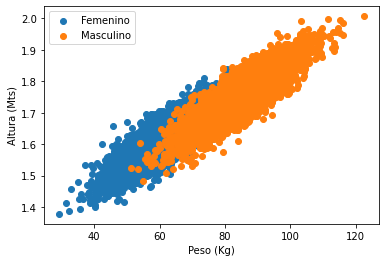

In [13]:
plt.scatter(x_mujeres, y_mujeres, label='Femenino')
plt.scatter(x_hombres, y_hombres, label='Masculino')

plt.xlabel('Peso (Kg)')
plt.ylabel('Altura (Mts)')
plt.legend()

In [ ]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio

Altura promedio sexo femenino: 1.6182028495269973


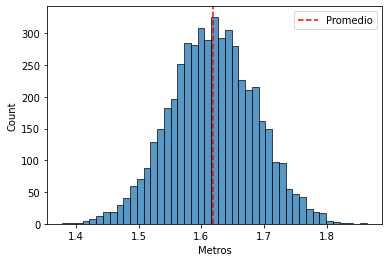

In [14]:
promedio_f = y_mujeres.mean()
sns.histplot(y_mujeres, kde=False)
plt.axvline(promedio_f, color='red', linestyle="--", label='Promedio')
plt.legend()

print(f'Altura promedio sexo femenino: {promedio_f}')

In [ ]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio

Altura promedio sexo masculino: 1.7532691860179217


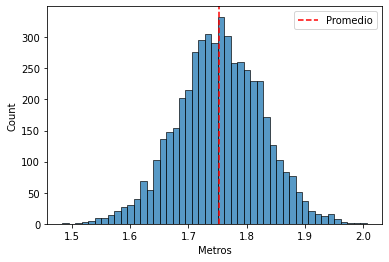

In [15]:
promedio_m = y_hombres.mean()
sns.histplot(y_hombres, kde=False)
plt.axvline(promedio_m, color='red', linestyle="--", label='Promedio')
plt.legend()

print(f'Altura promedio sexo masculino: {promedio_m}')

In [ ]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"

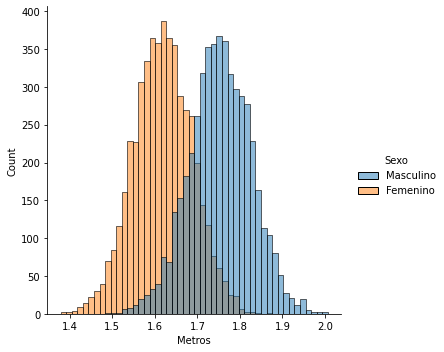

In [16]:
sns.displot(data=df2, x='Metros',hue='Sexo')

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [18]:
df_fem = df2[df2['Sexo'] == 'Femenino']
X_fem  = df_fem[['Kilogramos']].values
y_fem  = df_fem['Metros'].values

df_mas = df2[df2['Sexo'] == 'Masculino']
X_mas  = df_mas[['Kilogramos']].values
y_mas  = df_mas['Metros'].values 

In [19]:
from sklearn.model_selection import train_test_split

X_train_fem, X_test_fem, y_train_fem, y_test_fem = train_test_split(X_fem, y_fem, test_size=0.3, random_state=42)

X_train_mas, X_test_mas, y_train_mas, y_test_mas = train_test_split(X_mas, y_mas, test_size=0.3, random_state=42)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mse_train_fem_list = []
mse_test_fem_list  = []
mse_train_mas_list = []
mse_test_mas_list  = []

for degree in range(1, 11):

    poly = PolynomialFeatures(degree=degree)
    
    X_train_fem_poly = poly.fit_transform(X_train_fem)
    X_test_fem_poly  = poly.fit_transform(X_test_fem)

    X_train_mas_poly = poly.fit_transform(X_train_mas)
    X_test_mas_poly  = poly.fit_transform(X_test_mas)

    lr = LinearRegression()
    lr.fit(X_train_fem_poly, y_train_fem)
    y_hat_fem       = lr.predict(X_test_fem_poly)
    y_hat_fem_train = lr.predict(X_train_fem_poly)

    mse_fem       = mean_squared_error(y_test_fem, y_hat_fem)
    mse_train_fem = mean_squared_error(y_train_fem, y_hat_fem_train)

    mse_train_fem_list.append(mse_train_fem)
    mse_test_fem_list.append(mse_fem)

    lr = LinearRegression()
    lr.fit(X_train_mas_poly, y_train_mas)
    y_hat_mas       = lr.predict(X_test_mas_poly)
    y_hat_mas_train = lr.predict(X_train_mas_poly)

    mse_mas       = mean_squared_error(y_test_mas, y_hat_mas)
    mse_train_mas = mean_squared_error(y_train_mas, y_hat_mas_train)

    mse_train_mas_list.append(mse_train_mas)
    mse_test_mas_list.append(mse_mas)

  

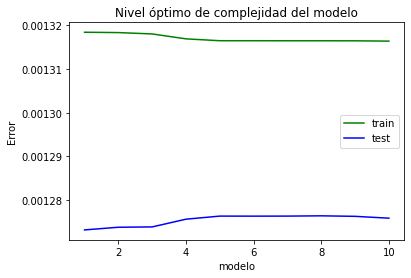

Nivel óptimo: 1


In [21]:
plt.plot(range(1, 11), mse_train_fem_list, c='g', label="train")
plt.plot(range(1, 11), mse_test_fem_list, c='b', label="test")
plt.xlabel("modelo")
plt.ylabel("Error")
plt.legend()
plt.title("Nivel óptimo de complejidad del modelo")
plt.show()
print('Nivel óptimo:', mse_test_fem_list.index(min(mse_test_fem_list))+1)

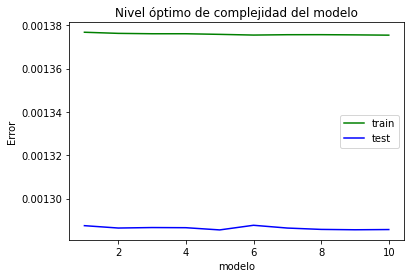

Nivel óptimo: 5


In [22]:
plt.plot(range(1, 11), mse_train_mas_list, c='g', label="train")
plt.plot(range(1, 11), mse_test_mas_list, c='b', label="test")
plt.xlabel("modelo")
plt.ylabel("Error")
plt.legend()
plt.title("Nivel óptimo de complejidad del modelo")
plt.show()
print('Nivel óptimo:', mse_test_mas_list.index(min(mse_test_mas_list))+1)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_fem = PolynomialFeatures(degree=1)

X_train_fem_poly = poly_fem.fit_transform(X_train_fem)
X_test_fem_poly  = poly_fem.fit_transform(X_test_fem)

lr_fem = LinearRegression()
lr_fem.fit(X_train_fem_poly, y_train_fem)
y_hat_f = lr_fem.predict(X_test_fem_poly)

poly_mas = PolynomialFeatures(degree=5)

X_train_mas_poly = poly_mas.fit_transform(X_train_mas)
X_test_mas_poly  = poly_mas.fit_transform(X_test_mas)

lr_mas = LinearRegression()
lr_mas.fit(X_train_mas_poly, y_train_mas)
y_hat_m = lr_mas.predict(X_test_mas_poly)

In [89]:
y_hat_m


array([1.83020339, 1.72880358, 1.7261795 , ..., 1.84446761, 1.82295864,
       1.75720187])

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test_fem, y_hat_f)
print(f"Coeficiente de determinación: {score:.2f}")

Coeficiente de determinación: 0.73


In [26]:
from sklearn.metrics import r2_score
score = r2_score(y_test_mas, y_hat_m)
print(f"Coeficiente de determinación: {score:.2f}")

Coeficiente de determinación: 0.75


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

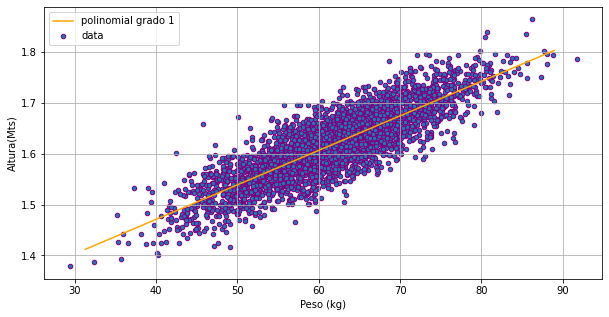

In [27]:
lx      = sorted(X_test_fem)
lx_poly = poly_fem.fit_transform(lx)
ly      = lr_fem.predict(lx_poly)

fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot()

ax.plot(lx, ly, label="polinomial grado 1", color='orange')
ax.scatter(X_train_fem, y_train_fem, edgecolor='purple', s=20, label="data")
ax.set_xlabel('Peso (kg)')
ax.set_ylabel('Altura(Mts)')
ax.legend()
ax.grid('dashed')
plt.show()

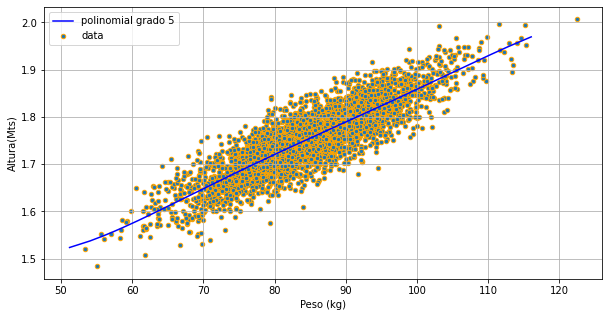

In [55]:
lx      = sorted(X_test_mas)
lx_poly = poly_mas.fit_transform(lx)
ly      = lr_mas.predict(lx_poly)

fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot()

ax.plot(lx, ly, label="polinomial grado 5", color='blue')
ax.scatter(X_train_mas, y_train_mas, edgecolor='orange', s=20, label="data")
ax.set_xlabel('Peso (kg)')
ax.set_ylabel('Altura(Mts)')
ax.legend()
ax.grid('dashed')
plt.show()

In [ ]:
import sys
!{sys.executable} -m pip install gradio

In [91]:
peso = np.array([[100]])
p = poly_mas.fit_transform(peso)
lr_mas.predict(p)

array([1.85853134])

In [92]:
peso1 = np.array([[100]])
p1 = poly_fem.fit_transform(peso1)
lr_fem.predict(p1)

array([1.87781631])

In [99]:
import gradio as gr

def mujeres(peso):
  peso_fem = np.array([[peso]])
  p = poly_fem.fit_transform(peso_fem)
  altura = lr_fem.predict(p)
  return f'{altura[0]:.2f} Mts'
    

iface = gr.Interface(
                      fn      = mujeres,
                      inputs  = [gr.inputs.Slider(1, 200)],
                      outputs = "text",
                      layout  = "vertical"
                    )

iface.launch()


We want to invite you to become a beta user.
You'll get early access to new and premium features (persistent links, hosting, and more).
If you're interested please email beta@gradio.app

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://21868.gradio.app
Interface loading below...


Tip: Add interpretation to your model by simply adding `interpretation="default"` to `Interface()`


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7884/',
 'https://21868.gradio.app')

In [ ]:
import gradio as gr

def hombress(peso1):
  peso_mas = np.array([[peso1]])
  p = poly_mas.fit_transform(peso_mas)
  altura = lr_mas.predict(p)
  return f'{altura[0]:.2f} Mts'
    

iface = gr.Interface(
                      fn      = hombress,
                      inputs  = [gr.inputs.Slider(1, 200)],
                      outputs = "text",
                      layout  = "vertical"
                    )

iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://44092.gradio.app
Interface loading below...


Tip: Add interpretation to your model by simply adding `interpretation="default"` to `Interface()`


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7888/',
 'https://44092.gradio.app')